# FINRA Surveillance Business Analyst Pre-Screening Tasks

Import the necessary packages to the jupyter notebook.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Create a sample data.

In [2]:
data = {'DATE':['2/3/2014', '2/4/2014', '2/7/2014', '2/10/2014',
                '2/12/2014','2/14/2014','2/21/2014',
                '2/24/2014','2/25/2014','2/27/2014'],
        'FIRM':['1ABC', '2BCD', '1ABC', '3CDE','4DEF',
                '3CDE','1ABC','1ABC','4DEF','CDE'],       
        'SYMBOL':['A123','B234','C345','C345','B234',
                  'B234','A123','A123','C345','B234'],
        'SIDE':['B','B','S','S','B','B','B','S','B','S'],
        'QUANTITY': [200,600,600,600,200,300,300,300,2100,1100],
       'PRICE': [41,60,70,70,62,61,40,30,71,63]}

df = pd.DataFrame(data)
df

,DATE,FIRM,SYMBOL,SIDE,QUANTITY,PRICE
0,2/3/2014,1ABC,A123,B,200,41
1,2/4/2014,2BCD,B234,B,600,60
2,2/7/2014,1ABC,C345,S,600,70
3,2/10/2014,3CDE,C345,S,600,70
4,2/12/2014,4DEF,B234,B,200,62
5,2/14/2014,3CDE,B234,B,300,61
6,2/21/2014,1ABC,A123,B,300,40
7,2/24/2014,1ABC,A123,S,300,30
8,2/25/2014,4DEF,C345,B,2100,71
9,2/27/2014,CDE,B234,S,1100,63


### Question 1. Based on the data in the table above, please draft a paragraph that describes your data observations and description of what is going on in the market during February 2014.

We firstly plot the histogram of transactions for each firm and each symbol.

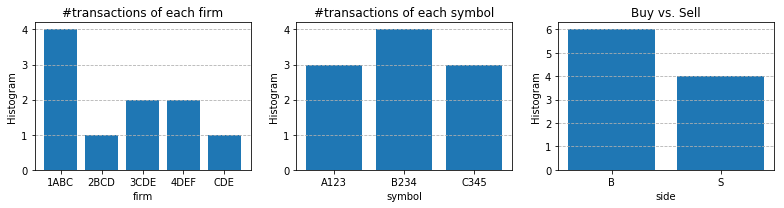

In [3]:
fig, ax = plt.subplots(1, 3,figsize=(11,3))

firms,counts = np.unique(df['FIRM'],return_counts=True)
ax[0].bar(firms, counts)
ax[0].set_title('#transactions of each firm')
ax[0].set_xlabel('firm')
ax[0].set_xticks([0,1,2,3,4])

firms,counts = np.unique(df['SYMBOL'],return_counts=True)
ax[1].bar(firms, counts)
ax[1].set_title('#transactions of each symbol')
ax[1].set_xlabel('symbol')

firms,counts = np.unique(df['SIDE'],return_counts=True)
ax[2].bar(firms, counts)
ax[2].set_title('Buy vs. Sell')
ax[2].set_xlabel('side')

for i in range(3):
    ax[i].grid(axis='y',ls='--')
    ax[i].set_ylabel('Histogram')

fig.tight_layout(h_pad=1, w_pad=1.5)

From the histogram graphs, we can conclude that

1) There were 5 firms (1ABC, 2BCD, 3CDE, 4DEF, CDE) that made 10 transactions in total. 1ABC was the firm that trade most frequently (with 4 transactions). 2BCD and CDE are the firms that traded only 1 transaction. 3CDE and 4DEF equally made 2 transactions.

2) 3 symbols were made, including A123, B234 and C345.

3) 10 transactions were made in total, including 6 buys and 4 sells.

We explore the data in more details by plotting the histogram of quantity and price.

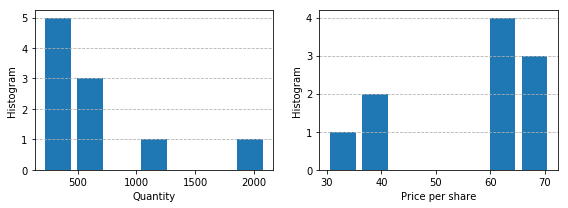

In [4]:
fig, ax = plt.subplots(1, 2,figsize=(8,3))

q = df['QUANTITY']
bins = np.linspace(min(q), max(q),8)
ax[0].hist(q,bins,histtype='bar',rwidth=0.8)
ax[0].grid(axis='y',ls='--')
ax[0].set_xlabel('Quantity')
ax[0].set_ylabel('Histogram')

p = df['PRICE']
bins = np.linspace(min(p), max(p),8)
ax[1].hist(p,bins,histtype='bar',rwidth=0.8)
ax[1].grid(axis='y',ls='--')
ax[1].set_xlabel('Price per share')
ax[1].set_ylabel('Histogram')

fig.tight_layout(h_pad=1, w_pad=1.5)

The quantity distributed as a Posion function. The quantity of 200-300 was traded most frequently.
The price per share of 60-70 was mostly selected to trade.

Calculate the total dollar volume of each side.

In [5]:
## Total buy
df1 = df[df['SIDE'] == 'B']
total_buy = sum(df1['QUANTITY']*df1['PRICE'])
print('Total buy:',total_buy)

## Total sell
df2 = df[df['SIDE'] == 'S']
total_sell = sum(df2['QUANTITY']*df2['PRICE'])
print('Total sell:',total_sell)

Total buy: 236000
Total sell: 162300


We visualize the result.

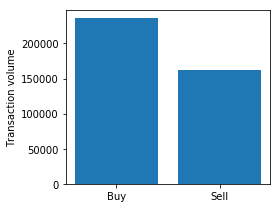

In [6]:
fig, ax = plt.subplots(1, 1,figsize=(4,3))
ax.bar(['Buy','Sell'], [total_buy,total_sell])
ax.set_ylabel('Transaction volume')
fig.tight_layout(h_pad=1, w_pad=1.5)

### Question 2. Your business user asks you for a series of items as follows. In each of the items below, if you make assumptions to complete the task, please document them.
#### A. Your business user asks you to tell them the unique symbols in the data table above.

Use `np.unique` to find the unique symbols in the data table, then write the result.

In [7]:
unique_symbol = np.unique(df['SYMBOL'])
print('There were', len(unique_symbol), 'unique symbols:')
print(unique_symbol)

There were 3 unique symbols:
['A123' 'B234' 'C345']


#### B. Your business user asks you to tell them the unique firm and symbol combinations in the data table above.

Create a new column that combines the unique `firm` and `symbol`.

In [8]:
df['firm_symbol'] = df['FIRM'].map(str) + df['SYMBOL']

Use `np.unique` to find the unique combinations, then write the result.

In [9]:
unique_firm_symbol = np.unique(df['firm_symbol'])
print('There were', len(unique_firm_symbol), 'unique firm-symbol combinations:')
print(unique_firm_symbol)

There were 8 unique firm-symbol combinations:
['1ABCA123' '1ABCC345' '2BCDB234' '3CDEB234' '3CDEC345' '4DEFB234'
 '4DEFC345' 'CDEB234']


#### C. Your business user asks you to show them a table that includes the number of trades for each firm and symbol combination in the data table above.

Use `np.unique` with option `return_counts = True` to find the unique combinations and number of trades for each combinations.

In [10]:
unique_firm_symbol,number_trades = np.unique(df['firm_symbol'],return_counts=True)

Create a data frame to show the result.

In [11]:
data_firm_symbol = {'firm_symbol': unique_firm_symbol,'number_trades':number_trades}
df_firm_symbol = pd.DataFrame(data_firm_symbol)
df_firm_symbol

,firm_symbol,number_trades
0,1ABCA123,3
1,1ABCC345,1
2,2BCDB234,1
3,3CDEB234,1
4,3CDEC345,1
5,4DEFB234,1
6,4DEFC345,1
7,CDEB234,1


### Question 3. Based on the data table above, your business user asks you to create a report that shows, for each firm, the symbols they traded and the total dollar volume they traded in that symbol.

Find the unique firms.

In [12]:
unique_firm = np.unique(df['FIRM'])
print('The unique firms:',unique_firm)
print('Number of unique firms:',len(unique_firm))

The unique firms: ['1ABC' '2BCD' '3CDE' '4DEF' 'CDE']
Number of unique firms: 5


Make a for loop for each firm and find the unique symbols they traded, then find the total dollar volume by calculating the `sum` of multiplication `QUANTITY` and `FRICE`.

In [13]:
firm_list = []
symbol_list = []
total_volume_list = []

for firm in unique_firm:
    print("\n")
    print('Firm:',firm)
    
    # create a new data frame for each firm:
    df_firm = df[df['FIRM'] == firm]
    
    # the symbols they traded
    unique_symbol = np.unique(df_firm['SYMBOL'])
    print('The symbols they traded:',unique_symbol)
    
    # total dollar volume in each symbol
    for symbol in unique_symbol:         
        df_symbol = df_firm[df_firm['SYMBOL'] == symbol]
        total_volume = sum(df_symbol['QUANTITY']*df_symbol['PRICE'])
        print('Symbol',symbol,'was traded with a total dollar volume:',total_volume)
        
        # adding to a list, to create a data frame
        firm_list.append(firm)
        symbol_list.append(symbol)
        total_volume_list.append(total_volume)        



Firm: 1ABC
The symbols they traded: ['A123' 'C345']
Symbol A123 was traded with a total dollar volume: 29200
Symbol C345 was traded with a total dollar volume: 42000


Firm: 2BCD
The symbols they traded: ['B234']
Symbol B234 was traded with a total dollar volume: 36000


Firm: 3CDE
The symbols they traded: ['B234' 'C345']
Symbol B234 was traded with a total dollar volume: 18300
Symbol C345 was traded with a total dollar volume: 42000


Firm: 4DEF
The symbols they traded: ['B234' 'C345']
Symbol B234 was traded with a total dollar volume: 12400
Symbol C345 was traded with a total dollar volume: 149100


Firm: CDE
The symbols they traded: ['B234']
Symbol B234 was traded with a total dollar volume: 69300


Create a data frame and show the result.

In [14]:
df_traded_data = {'FIRM': firm_list, 'SYMBOL': symbol_list, 'TOTAL_DOLLAR_VOLUME': total_volume_list}
df_traded = pd.DataFrame(df_traded_data)
df_traded

,FIRM,SYMBOL,TOTAL_DOLLAR_VOLUME
0,1ABC,A123,29200
1,1ABC,C345,42000
2,2BCD,B234,36000
3,3CDE,B234,18300
4,3CDE,C345,42000
5,4DEF,B234,12400
6,4DEF,C345,149100
7,CDE,B234,69300
